In [267]:
import pandas as pd

fedrate_df = pd.read_csv(r"C:\Users\home\workspace\FED-Interest-Rate\data\FedReserveQuarterlyTrainingData.csv")
test_data = pd.read_csv(r"C:\Users\home\workspace\FED-Interest-Rate\data\FedReserveQuarterlyTestData.csv")
fedrate_df.head()

,GDPDeflat,CPIRate,UnemployRate,InflationRate,PCED,FedFundsRate,RateChange,RateChangeInd
0,42.86,80.1,6.3,14.8,42.40,17.19,NaN,1
1,43.80,82.7,7.6,14.4,43.44,9.47,-7.72,0
2,44.81,84.0,7.5,12.6,44.45,10.87,1.40,1
3,46.05,86.3,7.2,12.5,45.55,18.90,8.03,1
4,47.20,88.5,7.4,10.5,46.68,14.70,-4.20,0


                            OLS Regression Results                            
Dep. Variable:           FedFundsRate   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     319.7
Date:                Tue, 24 Jul 2018   Prob (F-statistic):           2.01e-59
Time:                        14:38:19   Log-Likelihood:                -209.21
No. Observations:                 104   AIC:                             428.4
Df Residuals:                      99   BIC:                             441.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
GDPDeflat         2.0161      0.437      4.612

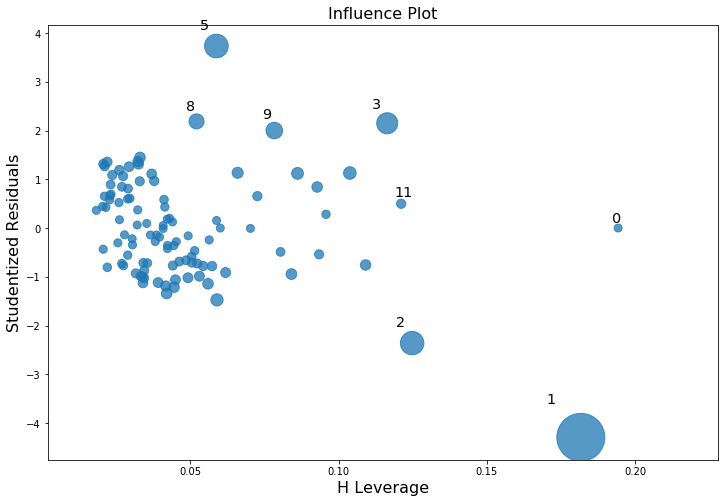

In [268]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

def print_OLS_model(removedItem = None):
    xcolumns = ['GDPDeflat','CPIRate','UnemployRate', 'InflationRate', 'PCED']
    if(removedItem != None):
        xcolumns.remove(removedItem)
    predictors = pd.DataFrame(fedrate_df, columns = xcolumns)
    ycolumns = ['FedFundsRate']
    response = pd.DataFrame(fedrate_df, columns = ycolumns)
    # OLS
    lin_model = sm.OLS(response, predictors).fit()
    print(lin_model.summary())
    
    # To determine outliers.
    # https://www.statease.com/
    # The graphical plots provide a better perspective on whether a case (or two) “sticks out” from the others.
    # Cook’s distance: A measure of how much the entire regression function changes when the ith point
    # is not included for fitting the model. It is essentially the sum of differences in predictions at
    # every point caused by leaving a point out for fitting the model.
    fig, ax = plt.subplots(figsize=(12,8))
    fig = sm.graphics.influence_plot(lin_model, ax=ax, criterion="cooks")
    
    # http://www.statsmodels.org
    # Since we are doing multivariate regressions, we cannot just look at individual bivariate plots to discern relationships.
    # Instead, we want to look at the relationship of the dependent variable and independent variables conditional on the other
    # independent variables. We can do this through using partial regression plots, otherwise known as added variable plots.
    if(removedItem != None):
        fig, ax = plt.subplots(figsize=(12,8))
        fig = sm.graphics.plot_partregress('FedFundsRate', removedItem, xcolumns, data = fedrate_df, ax = ax)
    
print_OLS_model(None)

               GDPDeflat   CPIRate  UnemployRate       ECI  InflationRate
GDPDeflat       1.000000  0.998494     -0.718384  0.992992      -0.672153
CPIRate         0.998494  1.000000     -0.713574  0.993855      -0.668419
UnemployRate   -0.718384 -0.713574      1.000000 -0.695810       0.401935
ECI             0.992992  0.993855     -0.695810  1.000000      -0.632817
InflationRate  -0.672153 -0.668419      0.401935 -0.632817       1.000000


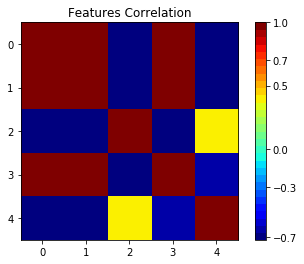

In [269]:
from matplotlib import pyplot as plt
from matplotlib import cm as cm
    
def correlation_matrix(dataframe):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(dataframe.corr(), interpolation="nearest", cmap = cmap)
    plt.title('Features Correlation')
    labels = ['GDP Deflation','CPI Rate','Unemployment Rate', 'Inflation Rate', 'PCED']
    fig.colorbar(cax, ticks=[-.7, -.3, 0, .5, .7, 1])
    plt.show()

print(predictors.corr())
correlation_matrix(predictors)

                            OLS Regression Results                            
Dep. Variable:           FedFundsRate   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     327.9
Date:                Tue, 24 Jul 2018   Prob (F-statistic):           1.56e-56
Time:                        14:38:36   Log-Likelihood:                -219.34
No. Observations:                 104   AIC:                             446.7
Df Residuals:                     100   BIC:                             457.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
CPIRate          -0.2935      0.057     -5.128

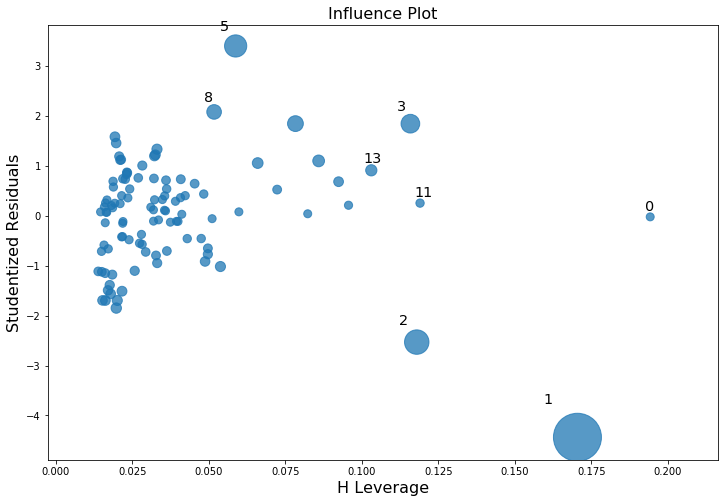

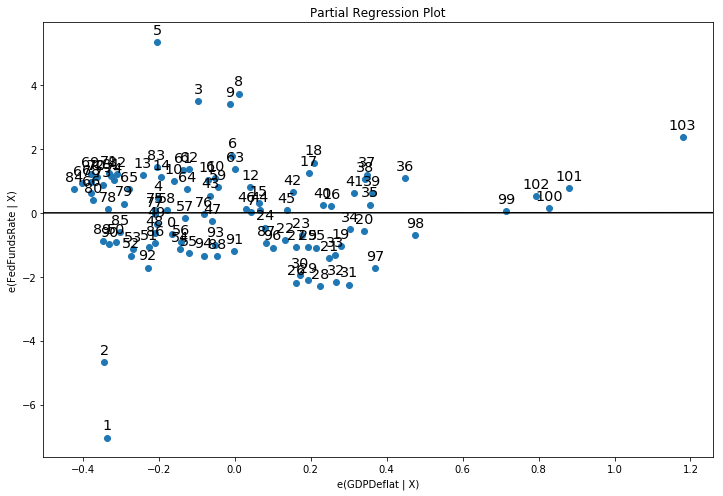

In [270]:
# Feature Selection
print_OLS_model('GDPDeflat')


                            OLS Regression Results                            
Dep. Variable:           FedFundsRate   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     276.0
Date:                Tue, 24 Jul 2018   Prob (F-statistic):           4.32e-53
Time:                        11:21:06   Log-Likelihood:                -227.59
No. Observations:                 104   AIC:                             463.2
Df Residuals:                     100   BIC:                             473.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
GDPDeflat         1.4114      0.507      2.784

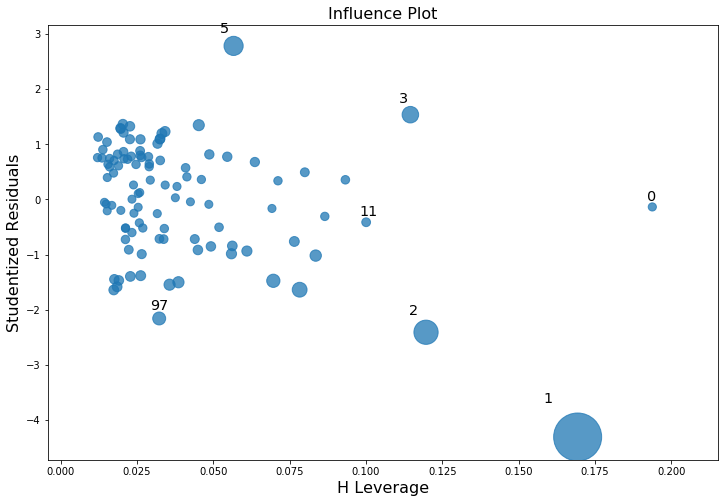

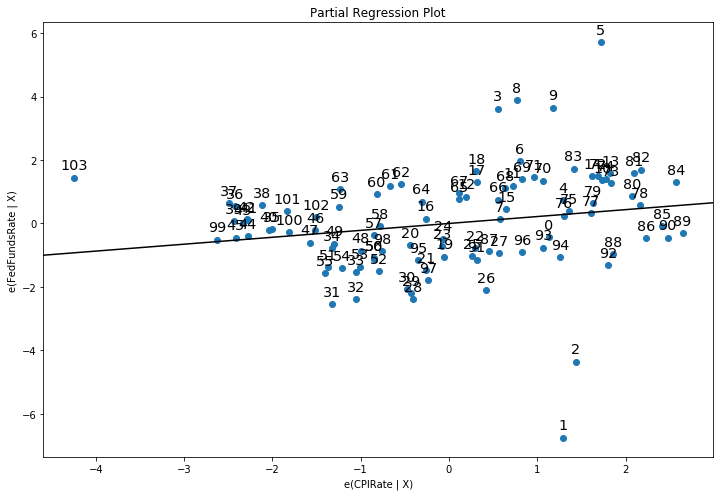

In [205]:
print_OLS_model('CPIRate')

                            OLS Regression Results                            
Dep. Variable:           FedFundsRate   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     368.5
Date:                Tue, 24 Jul 2018   Prob (F-statistic):           6.79e-59
Time:                        14:38:44   Log-Likelihood:                -213.67
No. Observations:                 104   AIC:                             435.3
Df Residuals:                     100   BIC:                             445.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
GDPDeflat         0.7630      0.123      6.214

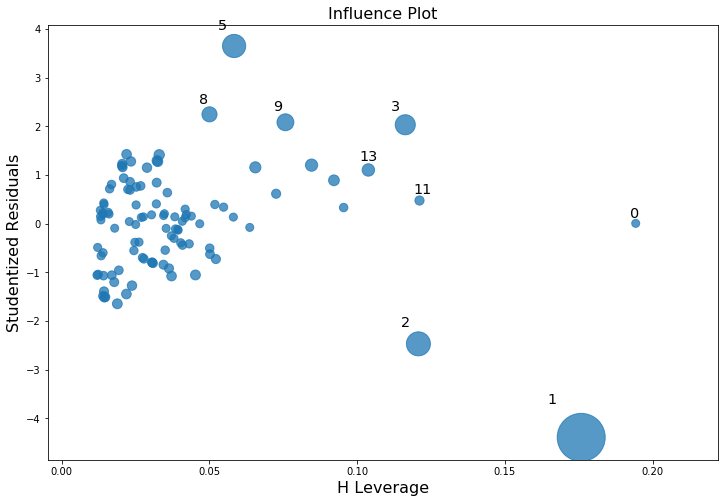

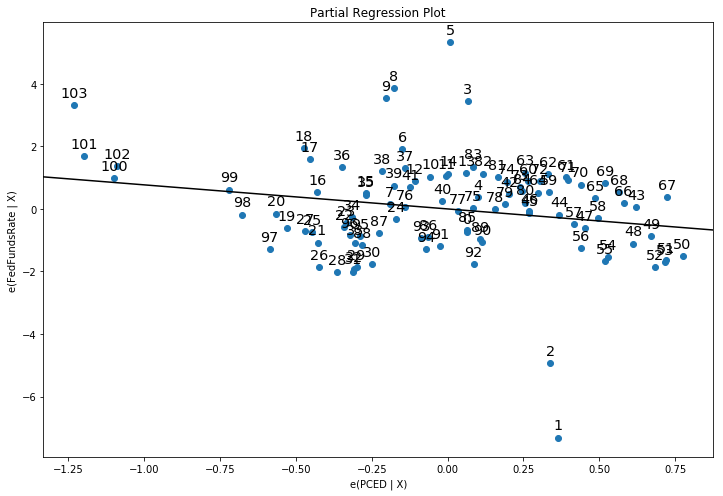

In [271]:
print_OLS_model('PCED')

                            OLS Regression Results                            
Dep. Variable:           FedFundsRate   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     388.7
Date:                Tue, 24 Jul 2018   Prob (F-statistic):           5.51e-60
Time:                        14:38:47   Log-Likelihood:                -211.06
No. Observations:                 104   AIC:                             430.1
Df Residuals:                     100   BIC:                             440.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
GDPDeflat         1.4575      0.326      4.467

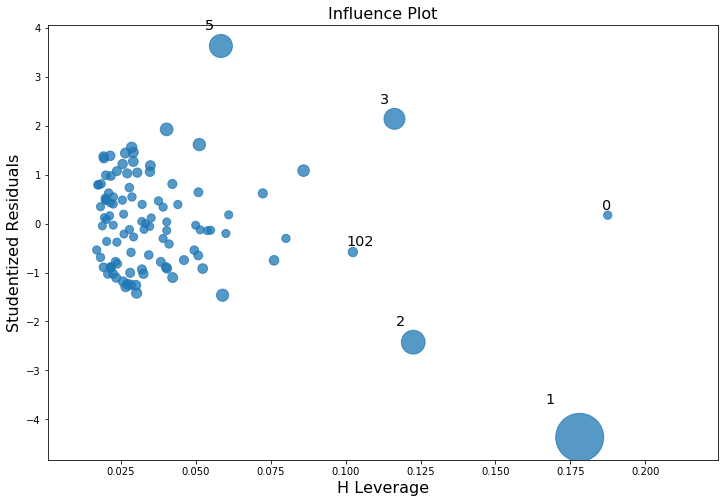

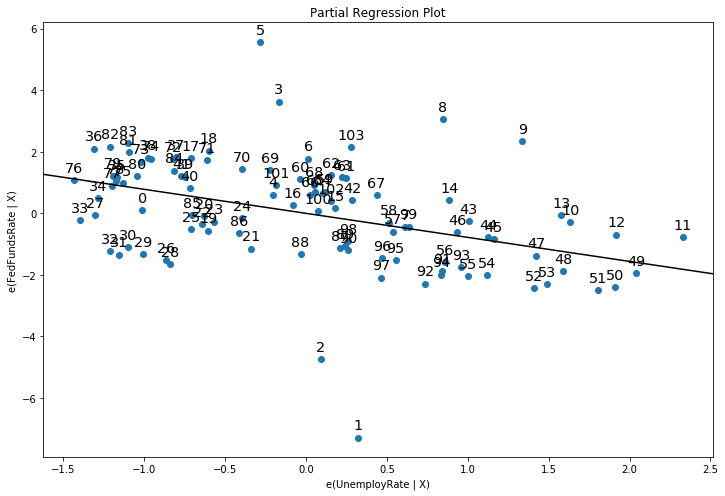

In [272]:
print_OLS_model('UnemployRate')

                            OLS Regression Results                            
Dep. Variable:           FedFundsRate   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     151.9
Date:                Tue, 24 Jul 2018   Prob (F-statistic):           1.44e-41
Time:                        14:38:50   Log-Likelihood:                -255.26
No. Observations:                 104   AIC:                             518.5
Df Residuals:                     100   BIC:                             529.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
GDPDeflat        2.3884      0.675      3.536   

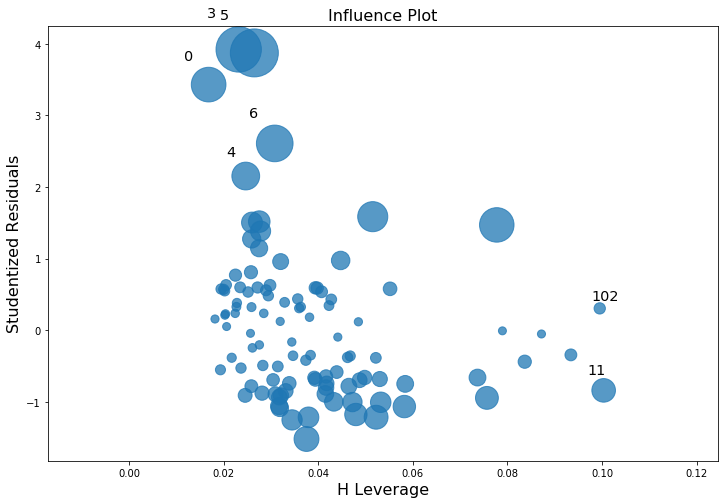

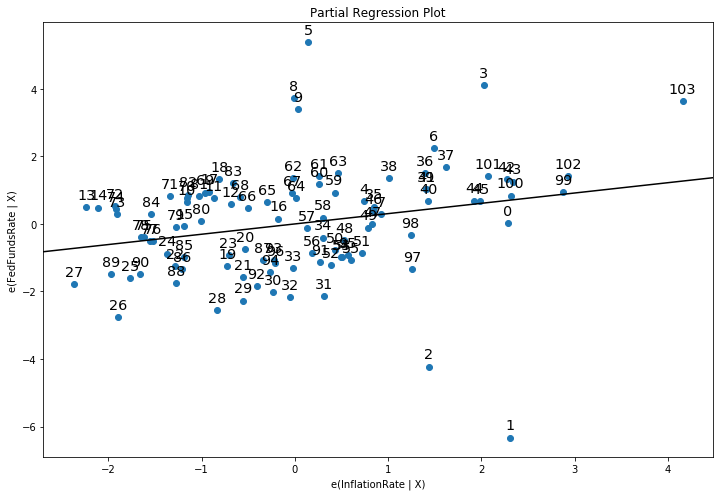

In [273]:
print_OLS_model('InflationRate')

In [280]:
from sklearn.ensemble import RandomForestRegressor

response = pd.DataFrame(fedrate_df, columns = ycolumns)
predictors = pd.DataFrame(fedrate_df, columns = xcolumns)

regr = RandomForestRegressor(max_depth = 5, random_state = 0, n_estimators = 500)
regr.fit(predictors, response.values.ravel())
print(xcolumns)
print(regr.feature_importances_)

# Unemployment Rate and Inflation Rate don't look like they have this influence on the model

['GDPDeflat', 'CPIRate', 'UnemployRate', 'InflationRate', 'PCED']
[0.29674647 0.27257842 0.04616029 0.09132445 0.29319037]


In [282]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth = 5, random_state = 0, n_estimators = 500)
response = pd.DataFrame(fedrate_df, columns = ycolumns)
gbrt.fit(predictors, response.values.ravel())
print(xcolumns)
print(gbrt.feature_importances_)

# Feature importances from the gradient boosting regressor don't go hand in hand with the one from the ones in random forest.

['GDPDeflat', 'CPIRate', 'UnemployRate', 'InflationRate', 'PCED']
[0.14017611 0.12237096 0.14308831 0.11980839 0.13655623]


In [284]:
# Logistic regression model: 
xcolumns = ['GDPDeflat','CPIRate','UnemployRate', 'InflationRate', 'PCED']

x_train = pd.DataFrame(fedrate_df, columns = xcolumns)
y_train = pd.DataFrame(fedrate_df, columns = ['RateChangeInd'])

logit_model = sm.Logit(y_train,x_train).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.649233
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:          RateChangeInd   No. Observations:                  104
Model:                          Logit   Df Residuals:                       99
Method:                           MLE   Df Model:                            4
Date:                Tue, 24 Jul 2018   Pseudo R-squ.:                 0.06110
Time:                        14:44:18   Log-Likelihood:                -67.520
converged:                       True   LL-Null:                       -71.914
                                        LLR p-value:                   0.06663
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
GDPDeflat         1.3589      0.523      2.600      0.009       0.335       2.383
CPIRate          -0.

In [303]:
# A series is stationary if it has:
# 1) constant mean
# 2) constant variance
# 3) an autocovariance that does not depend on time.

# https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/
# Plotting Rolling Statistics: We can plot the moving average or moving variance and
# see if it varies with time. By moving average/variance I mean that at any instant ‘t’,
# we’ll take the average/variance of the last year, i.e. last 12 months. This is more of a visual technique.
# Dickey-Fuller Test: This is one of the statistical tests for checking stationarity. 
# Here the null hypothesis is that the TS is non-stationary. 
# The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. 
# If the ‘Test Statistic’ is less than the ‘Critical Value’, 
# we can reject the null hypothesis and say that the series is stationary.

from statsmodels.tsa.stattools import adfuller

series = pd.DataFrame(fedrate_df, columns = ycolumns)
dftest = adfuller(series.iloc[:,0].values, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Test Statistic                 -2.350880
p-value                         0.156083
#Lags Used                     13.000000
Number of Observations Used    90.000000
Critical Value (1%)            -3.505190
Critical Value (5%)            -2.894232
Critical Value (10%)           -2.584210
dtype: float64


                             ARIMA Model Results                              
Dep. Variable:         D.FedFundsRate   No. Observations:                  103
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -172.610
Method:                       css-mle   S.D. of innovations              1.274
Date:                Tue, 24 Jul 2018   AIC                            359.220
Time:                        15:12:51   BIC                            377.663
Sample:                             1   HQIC                           366.690
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0943      0.101     -0.938      0.351      -0.292       0.103
ar.L1.D.FedFundsRate    -0.1930      0.101     -1.920      0.058      -0.390       0.004
ar.L2.D.FedF

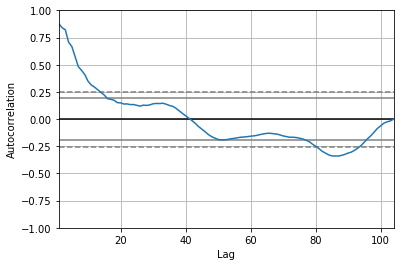

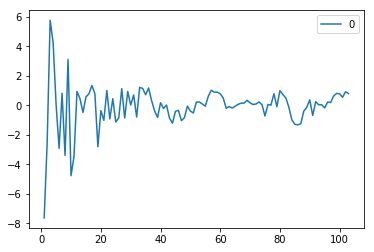

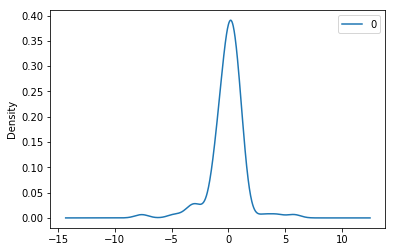

                0
count  103.000000
mean    -0.051001
std      1.503830
min     -7.625672
25%     -0.438651
50%      0.065963
75%      0.715506
max      5.769388


In [287]:
# ARIMA
# This acronym is descriptive, capturing the key aspects of the model itself. Briefly, they are:

# AR: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.
# I: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.
# MA: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.
# Each of these components are explicitly specified in the model as a parameter. A standard notation is used of ARIMA(p,d,q) where the parameters are substituted with integer values to quickly indicate the specific ARIMA model being used.

# The parameters of the ARIMA model are defined as follows:

# p: The number of lag observations included in the model, also called the lag order.
# d: The number of times that the raw observations are differenced, also called the degree of differencing.
# q: The size of the moving average window, also called the order of moving average.

from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA

autocorrelation_plot(series)

# fit model
model_fit = ARIMA(series, order=(5, 1, 0)).fit(disp = 0)
print(model_fit.summary())

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

residuals.plot(kind = 'kde')
plt.show()
print(residuals.describe())
